# Principal Component Analysis (PCA) from Scratch

This notebook explores Principal Component Analysis (PCA), a technique used to reduce the dimensionality of data while preserving as much variance as possible. We will implement PCA step by step from scratch and compare it with the Scikit-Learn implementation.

### **Exercise**: 
Your task is to read through the notebook and complete the code sections marked with `#FIXME#`.

## Table of Contents

* Background
* Data Example
* PCA with the Covariance Method
    * Step 1: Standardize the data
    * Step 2: Find the covariance matrix
    * Step 3: Find the eigenvectors and eigenvalues of the covariance matrix
    * Step 4: Rearrange the eigenvectors and eigenvalues
    * Step 5: Choose principal components
    * Step 6: Project the data
* PCA with Scikit-Learn

## Background
Principal Component Analysis (PCA) is a simple dimensionality reduction technique that can capture linear correlations between the features. For a given (standardized) data, PCA can be calculated by eigenvalue decomposition of covariance (or correlation) matrix of the data, or Singular Value Decomposition (SVD) of the data matrix. The data standardization includes mean removal and variance normalization.

## Data Example

In this project, we utilize the [IRIS dataset](https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_iris.html), a classic dataset widely used in machine learning. It comprises 50 samples from each of the three species of Iris: Iris setosa, Iris versicolor, and Iris virginica. Each sample is represented by a row, with columns detailing the measurements of Sepal Length, Sepal Width, Petal Length, and Petal Width. This rich dataset serves as an excellent foundation for demonstrating PCA and exploring the relationships between features.

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris['data']
y = iris['target']

n_samples, n_features = X.shape

print('Number of samples:', n_samples)
print('Number of features:', n_features)

Number of samples: 150
Number of features: 4


To better understand the relationships between the features (independent variables), we will visualize them using histograms and scatter plots. Histograms provide insights into the distribution of individual features, while scatter plots reveal potential correlations or patterns between pairs of features.

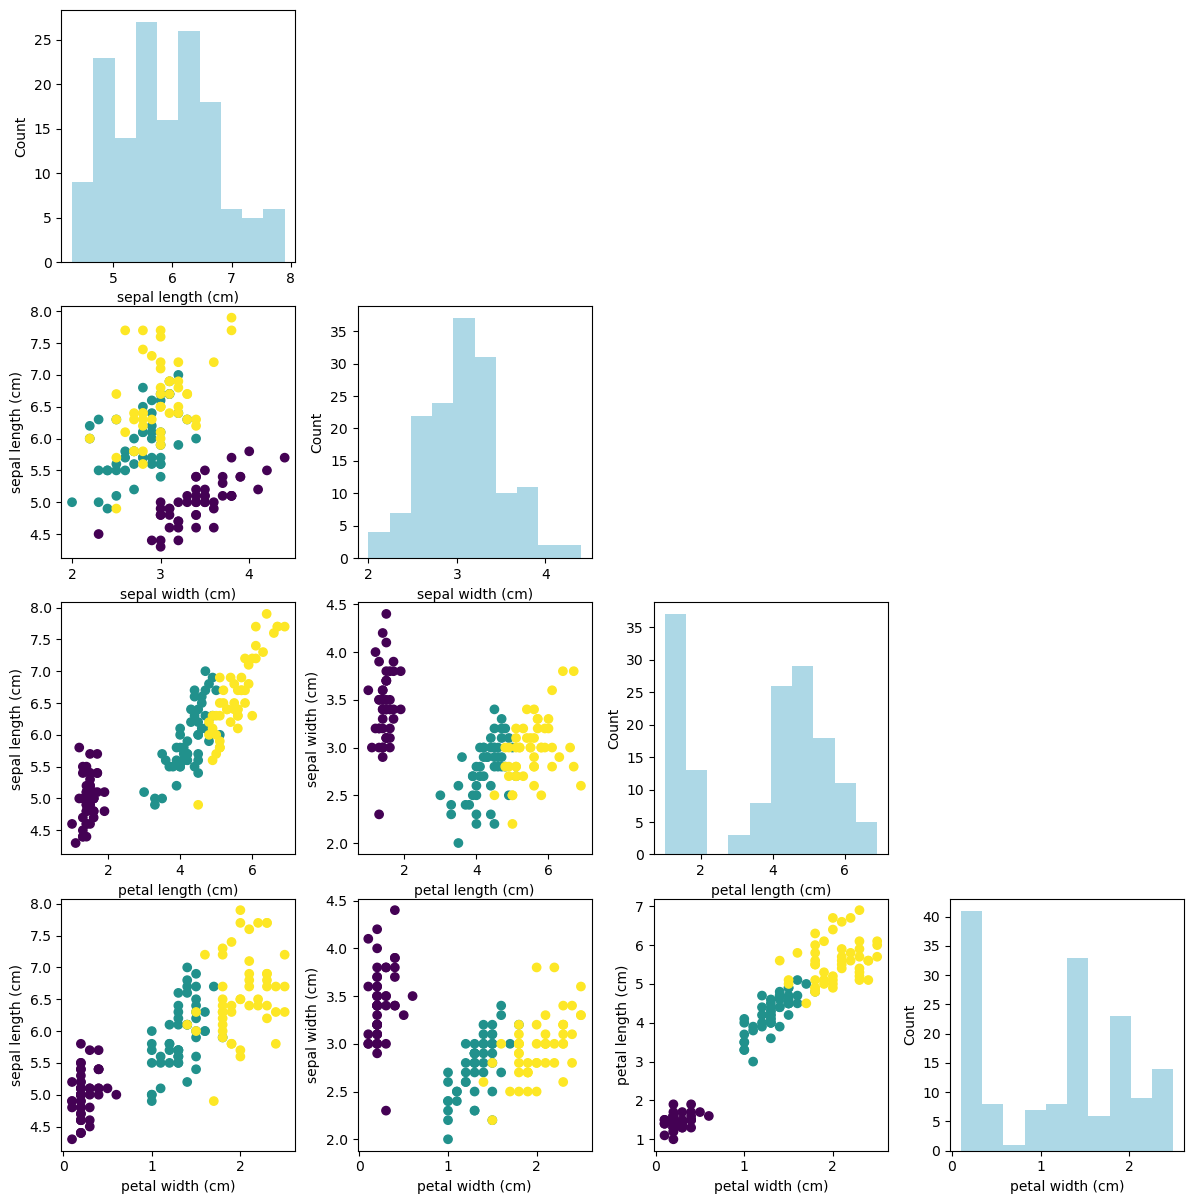

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
fig.tight_layout()

names = iris.feature_names

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(X[:, j], X[:, i], c=y)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(4):
    ax[i, i].hist(X[:, i], color='lightblue')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

## PCA with the Covariance Method

This section provides a comprehensive step-by-step guide outlining the general framework for computing Principal Component Analysis (PCA) using the covariance method. By following this process, we will gain insights into how PCA operates, allowing us to effectively reduce dimensionality while preserving the most significant variance in the dataset.

## Step 1: Standardize the Data

To ensure that all features contribute equally to the analysis, we standardize the data by subtracting the mean and scaling to unit variance. This step centers the data around zero and ensures that each feature has a standard deviation of one, which is crucial for PCA since it is sensitive to the scale of the input features.

In [16]:
def mean(x):
    return x.mean(axis=0)

def std(x):
    return x.std(axis=0)

def Standardize_data(X):
    return (X - mean(X))/std(X)

X_std = Standardize_data(X) #the purpose of standardizing the data is to ensure that the features contribute evenly to the algorithm, this is because PCA is sensitive to scale
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

## Step 2: Calculate the Covariance Matrix

Next, we compute the covariance matrix of the standardized data. This matrix captures the relationships between the features by showing how changes in one feature are associated with changes in another. It is a key component in identifying the directions of maximum variance for PCA.

In [17]:
def covariance(x):
    return (x.T @ x)/(len(x)-1)

cov_mat = covariance(X_std)

## Step 3: Find the eigenvectors and eigenvalues of the covariance matrix

In this step, we compute the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance, while the eigenvalues indicate the magnitude of this variance along each eigenvector. These components will help us identify the principal components of the data.

In [19]:
from numpy.linalg import eig

# Eigendecomposition of covariance matrix
eig_vals, eig_vecs = eig(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(len(eig_vecs))])
eig_vecs = eig_vecs * signs[np.newaxis, :]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


## Step 4: Rearrange the Eigenvectors and Eigenvalues

In this step, we sort the eigenvalues in descending order to prioritize the components that explain the most variance in the data. Correspondingly, we rearrange the eigenvectors to match the sorted eigenvalues. This allows us to identify the principal components that will be used for dimensionality reduction in the subsequent steps.

In [20]:
# We first make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vecs))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs]) #the purpose of sorting is to represent the eigen values/vectors from those with largest variance to the least variance
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

print(eig_pairs)

[(2.938085050199993, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654])), (0.9201649041624864, array([0.37741762, 0.92329566, 0.02449161, 0.06694199])), (0.14774182104494804, array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274])), (0.02085386217646207, array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))]


## Step 5: Choose Principal Components

At this stage, we select the first ***k*** eigenvectors, where ***k*** represents the desired number of dimensions for the new feature subspace (with ***k*** being less than or equal to the total number of features, ***n***). By choosing these top eigenvectors, we focus on the directions that capture the most variance in the data, effectively reducing its dimensionality while retaining essential information.

In [23]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :]  # Projection matrix

print(W.shape)

(2, 4)


Note that the value of ***k*** can be determined more effectively by analyzing the explained variance. Explained variance quantifies the amount of information (or variance) captured by each principal component, helping us choose a ***k*** that balances dimensionality reduction with the preservation of significant data characteristics.

Explained variance: [72.96 22.85  3.67  0.52]
Cumulative explained variance: [ 72.96  95.81  99.48 100.  ]


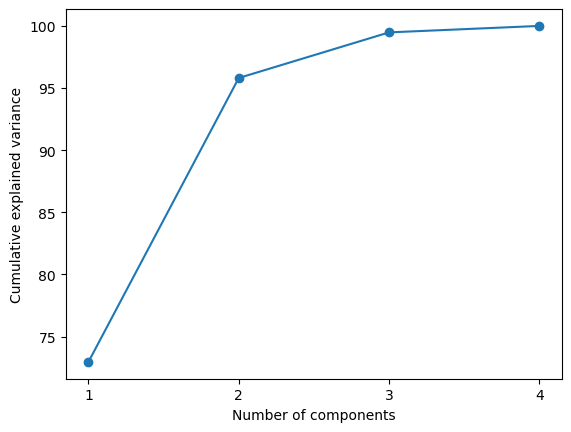

In [32]:
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)

print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

## Step 6: Project the Data

In the final step, we transform the original data matrix ***X*** using the projection matrix ***W***, which consists of the selected ***k*** eigenvectors. This operation projects the data into a ***k***-dimensional feature subspace, effectively reducing its dimensionality while preserving the most significant patterns and relationships within the data. This transformation prepares the data for further analysis or modeling in the reduced feature space.

In [34]:
X_proj = X_std.dot(W.T)

print(X_proj.shape)

(150, 2)


Here, we visualize the transformed data in the PCA space defined by the first two principal components: PC1 and PC2. This visualization allows us to observe the structure and relationships within the data in a reduced dimensionality, highlighting clusters or patterns that may not be apparent in the original feature space.

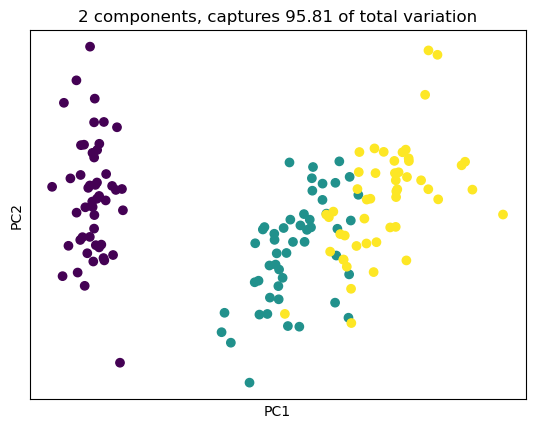

In [35]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

Next, we will consolidate all the steps outlined above into a single class, enabling us to train our own PCA implementation. We will then validate our results by comparing them with those obtained from Scikit-Learn's PCA model, ensuring the accuracy and effectiveness of our approach.

In [36]:
class MyPCA:

    def __init__(self, n_components):
        self.n_components = n_components

    def fit(self, X):
        # Standardize data
        X = X.copy()
        self.mean = np.mean(X, axis = 0)
        self.scale = np.std(X, axis = 0)
        X_std = (X - self.mean) / self.scale

        # Eigendecomposition of covariance matrix
        cov_mat = np.cov(X_std.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)

        # Adjusting the eigenvectors that are largest in absolute value to be positive
        max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
        signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
        eig_vecs = eig_vecs*signs[np.newaxis,:]
        eig_vecs = eig_vecs.T

        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        eig_vals_sorted = np.array([x[0] for x in eig_pairs])
        eig_vecs_sorted = np.array([x[1] for x in eig_pairs])

        self.components = eig_vecs_sorted[:self.n_components,:]

        # Explained variance ratio
        self.explained_variance_ratio = [i/np.sum(eig_vals) for i in eig_vals_sorted[:self.n_components]]

        self.cum_explained_variance = np.cumsum(self.explained_variance_ratio)

        return self

    def transform(self, X):
        X = X.copy()
        X_std = (X - self.mean) / self.scale
        X_proj = X_std.dot(self.components.T)

        return X_proj
# ---------------------------------------------------------
my_pca = MyPCA(n_components = 2).fit(X)

print('Components:\n', my_pca.components)
print('Explained variance ratio from scratch:\n', my_pca.explained_variance_ratio)
print('Cumulative explained variance from scratch:\n', my_pca.cum_explained_variance)

X_proj = my_pca.transform(X)
print('Transformed data shape from scratch:', X_proj.shape)

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio from scratch:
 [0.7296244541329989, 0.22850761786701754]
Cumulative explained variance from scratch:
 [0.72962445 0.95813207]
Transformed data shape from scratch: (150, 2)


## PCA with Scikit-Learn

In this section, we will perform PCA using the Scikit-Learn library. This powerful package simplifies the implementation of PCA and provides efficient tools for handling dimensionality reduction. We will walk through the steps to apply PCA using Scikit-Learn, demonstrating its functionality and ease of use.

In [ ]:
help("sklearn.decomposition")

Components:
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]]
Explained variance ratio:
 [0.72962445 0.22850762]
Cumulative explained variance:
 [0.72962445 0.95813207]
Transformed data shape: (150, 2)


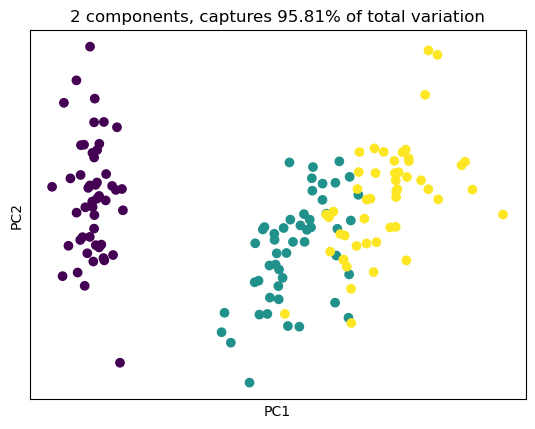

In [36]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_std)

print('Components:\n', pca.components_)
print('Explained variance ratio:\n', pca.explained_variance_ratio_)

cum_explained_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance:\n', cum_explained_variance)

X_pca = pca.transform(X_std) # Apply dimensionality reduction to X.
print('Transformed data shape:', X_pca.shape)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y)
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {}% of total variation'.format(cum_explained_variance[1].round(4)*100))
plt.show()

In conclusion, we have demonstrated that both our scratch implementation of PCA and the Scikit-Learn version yield identical results. This consistency validates our understanding of the PCA process and confirms the accuracy of our implementation. By comparing the two approaches, we can appreciate the underlying mechanics of PCA while benefiting from the efficiency and convenience offered by established libraries like Scikit-Learn.